In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Task Planner Agent

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/task-planner.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fsample-apps%2Fgenai-experience-concierge%2Fagent-design-patterns%2Ftask-planner.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/task-planner.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/task-planner.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/task-planner.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/task-planner.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/task-planner.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/task-planner.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/task-planner.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | |
|-|-|
|Author(s) | [Pablo Gaeta](https://github.com/pablofgaeta) |

## Overview

### Introduction

This notebook demonstrates an implementation of a task planner agent (similar to ["Deep Research"](https://gemini.google/overview/deep-research)) This is a multi-agent architecture useful for tasks requiring more complex reasoning, planning, and multi-tool use.

This architecture is often much slower than single-agent designs because a single turn can consist of a large number of LLM calls and tool usage. This demo is particularly slow because the "Executor" agent only supports linear plans and executes each task in parallel. There is research on alternative approaches such as [LLM Compiler](https://arxiv.org/abs/2312.04511) that attempt to improve this design by constructing DAGs to enable parallel task execution.

The "Executor" agent in this demo is a Gemini model equipped with the Google Search Grounding Tool ([documentation](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/ground-with-google-search)) to enable live web search while executing tasks.

### Key Components

The task planner agent is built around several key components:

* **Language Model:** Gemini is used for natural language understanding, function calling, and response generation for multiple agents.
* **State Management:** LangGraph manages the conversation flow and maintains the session state, including conversation history and generated/executed plans.
* **Planner Node:** Generates a plan or a direct response to the user input. The plan consists of a sequence of tasks to be executed.
* **Executor Node:** Executes the tasks defined in the plan, typically using tools like Google Search to gather information.
* **Reflector Node:** Analyzes the results of the executed plan and the user's input to determine the next action - either generating a new plan for further execution or formulating a final response to the user.

### Workflow

The agent operates through the following workflow:

1. The **Planner** receives user input and either (1) responds directly to simple queries (e.g. "Hi") or (2) generates a research plan, including list of tasks to execute.
1. The **Executor** receives the plan and uses its tools to perform each task and update the plan with the executed task result.
1. The **Reflector** reviews the executed plan and either (1) generates a final response to the user or (2) generates a new plan and jumps back to step 2.

## Get Started

### Install dependencies

In [1]:
%pip install -q google-genai langgraph langgraph-checkpoint pydantic tenacity

Note: you may need to restart the kernel to use updated packages.


### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
# import IPython

# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### Authenticate your notebook environment (Colab only)

If you're running this notebook on Google Colab, run the cell below to authenticate your environment.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

## Notebook parameters

In [2]:
# Use the environment variable if the user doesn't provide Project ID.
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

REGION = "us-central1"  # @param {type:"string"}
PLANNER_MODEL_NAME = "gemini-2.0-flash-001"  # @param {type:"string"}
REFLECTOR_MODEL_NAME = "gemini-2.0-flash-001"  # @param {type:"string"}
EXECUTOR_MODEL_NAME = "gemini-2.0-flash-001"  # @param {type:"string"}

## Define the Task Planner Agent

### Import dependencies

In [3]:
from collections.abc import AsyncGenerator
import datetime
from typing import Literal, TypedDict
import uuid

from IPython import display as ipd
from google import genai
from google.genai import errors as genai_errors
from google.genai import types as genai_types
from langchain_core.runnables import config as lc_config
from langgraph import graph
from langgraph import types as lg_types
from langgraph.checkpoint import memory
from langgraph.config import get_stream_writer
import pydantic
import requests
from tenacity import retry, retry_if_exception, stop_after_attempt, wait_exponential

### Define schemas

Defines all of the schemas, constants, and types required for building the agent.

In [4]:
# Agent config settings


class AgentConfig(pydantic.BaseModel):
    """Configuration settings for the agent, including project, region, and model details."""

    project: str
    """The Google Cloud project ID."""
    region: str
    """The Google Cloud region where the agent is deployed."""
    planner_model_name: str
    """The name of the Gemini model to use for planning."""
    executor_model_name: str
    """The name of the Gemini model to use for executing tasks."""
    reflector_model_name: str
    """The name of the Gemini model to use for reflecting on the plan and results."""


# Node names and literal types

REFLECTOR_NODE_NAME = "REFLECTOR"
"""The name of the reflector node in the LangGraph."""
REFLECTOR_NODE_TARGET_LITERAL = Literal["REFLECTOR"]
"""Literal type for the reflector node target."""

EXECUTOR_NODE_NAME = "EXECUTOR"
"""The name of the executor node in the LangGraph."""
EXECUTOR_NODE_TARGET_LITERAL = Literal["EXECUTOR"]
"""Literal type for the executor node target."""

PLANNER_NODE_NAME = "PLANNER"
"""The name of the planner node in the LangGraph."""
PLANNER_NODE_TARGET_LITERAL = Literal["PLANNER"]
"""Literal type for the planner node target."""

POST_PROCESS_NODE_NAME = "POST_PROCESS"
"""The name of the post-processing node in the LangGraph."""
POST_PROCESS_NODE_TARGET_LITERAL = Literal["POST_PROCESS"]
"""Literal type for the post-processing node target."""

END_NODE_TARGET_LITERAL = Literal["__end__"]
"""Literal type for the end node target."""

# langgraph models


class Task(pydantic.BaseModel):
    """An individual task with a goal and result."""

    goal: str = pydantic.Field(
        description="The description and goal of this step in the plan.",
    )
    """The description and goal of this step in the plan."""

    result: str | None = pydantic.Field(
        default=None,
        description="The result of this step determined by the plan executor. Always set this field to None",
    )
    """The result of this step determined by the plan executor. Always set this field to None."""


class Plan(pydantic.BaseModel):
    """A step-by-step sequential plan."""

    goal: str = pydantic.Field(description="High level goal for plan to help user.")
    """High level goal for plan to help user."""
    tasks: list[Task] = pydantic.Field(
        description="A list of individual tasks that will be executed in sequence before responding to the user. As the task gets more complex, you can add more steps.",
    )
    """A list of individual tasks that will be executed in sequence before responding to the user. As the task gets more complex, you can add more steps."""


class Response(pydantic.BaseModel):
    """Response to send to the user."""

    response: str
    """The response message to send to the user."""


class PlanOrRespond(pydantic.BaseModel):
    """Action to perform. Either respond to user or generate a research plan."""

    action: Response | Plan = pydantic.Field(
        description="The next action can either be a direct response to the user or generate a new plan if you need to think more and use tools."
    )
    """The next action can either be a direct response to the user or generate a new plan if you need to think more and use tools."""


# LangGraph models


class Turn(TypedDict, total=False):
    """
    Represents a single turn in a conversation.

    Attributes:
        id: Unique identifier for the turn.
        created_at: Timestamp of when the turn was created.
        user_input: The user's input in this turn.
        response: The agent's response in this turn, if any.
        plan: The agent's last generated plan for this turn, if any.
        messages: A list of Gemini content messages associated with this turn.
    """

    id: uuid.UUID
    """Unique identifier for the turn."""

    created_at: datetime.datetime
    """Timestamp of when the turn was created."""

    user_input: str
    """The user's input for this turn."""

    response: str
    """The agent's response for this turn, if any."""

    plan: Plan | None
    """The agent's last generated plan for this turn, if any."""

    messages: list[genai_types.Content]
    """List of Gemini Content objects representing the conversation messages in this turn."""


class GraphSession(TypedDict, total=False):
    """
    Represents the complete state of a conversation session.

    Attributes:
        id: Unique identifier for the session.
        created_at: Timestamp of when the session was created.
        current_turn: The current turn in the session, if any.
        turns: A list of all turns in the session.
    """

    id: uuid.UUID
    """Unique identifier for the session."""

    created_at: datetime.datetime
    """Timestamp of when the session was created."""

    current_turn: Turn | None
    """The current conversation turn."""

    turns: list[Turn]
    """List of all conversation turns in the session."""

### Utility Functions

In [5]:
def is_retryable_error(exception: BaseException) -> bool:
    """
    Determines if a given exception is considered retryable.

    This function checks if the provided exception is an API error with a retryable HTTP status code
    (429, 502, 503, 504) or a connection error.

    Args:
        exception: The exception to evaluate.

    Returns:
        True if the exception is retryable, False otherwise.
    """

    if isinstance(exception, genai_errors.APIError):
        return exception.code in [429, 502, 503, 504]
    if isinstance(exception, requests.exceptions.ConnectionError):
        return True
    return False

In [6]:
def stringify_task(task: Task, include_results: bool = True) -> str:
    """
    Formats a task into a human-readable string.

    This function takes a task and converts it into a formatted string,
    including the task goal and optionally the task result.

    Args:
        task (Task): The task.
        include_results (bool, optional): Whether to include the task result in the output. Defaults to True.

    Returns:
        str: The formatted task string.
    """
    output = f"**Goal**: {task.goal}"

    if include_results:
        output += f"\n\n**Result**: {task.result or 'incomplete'}"

    return output

In [7]:
def stringify_plan(plan: Plan, include_results: bool = True) -> str:
    """
    Formats an execution plan into a human-readable string.

    This function takes an execution plan and converts it into a formatted string,
    including the goal and a list of tasks.

    Args:
        plan (Plan): The execution plan.
        include_results (bool, optional): Whether to include task results in the output. Defaults to True.

    Returns:
        str: The formatted execution plan string.
    """
    tasks_str = "\n\n".join(
        f"**Task #{idx + 1}**\n\n"
        + stringify_task(task, include_results=include_results)
        for idx, task in enumerate(plan.tasks)
    )

    response = f"**Plan**: {plan.goal}\n\n{tasks_str}"

    return response

### Core Agent Operations

#### Plan Generator

Generates a plan or a direct response based on the current turn and conversation history.

In [8]:
@retry(
    retry=retry_if_exception(is_retryable_error),
    wait=wait_exponential(min=1, max=10),
    stop=stop_after_attempt(3),
    reraise=True,
)
async def generate_plan(
    current_turn: Turn,
    project: str,
    region: str,
    model_name: str,
    history: list[Turn] | None = None,
) -> PlanOrRespond:
    """
    Generates a plan or a direct response based on the current turn and conversation history.

    This function uses a Gemini model to analyze the user's input and the conversation history
    to determine whether to generate a step-by-step plan for further action or to provide a
    direct response to the user.

    Args:
        current_turn: The current turn in the conversation, containing the user's input.
        project: The Google Cloud project ID.
        region: The Google Cloud region.
        model_name: The name of the Gemini model to use.
        history: A list of previous turns in the conversation (optional).

    Returns:
        A PlanOrRespond object, which can either contain a Response object (to respond to the user)
        or a Plan object (to generate a new plan).
    """

    history = history or []

    client = genai.Client(vertexai=True, project=project, location=region)

    contents = [
        genai_types.Content(role=role, parts=[genai_types.Part.from_text(text=text)])
        for turn in history + [current_turn]
        for role, text in (
            ("user", turn.get("user_input")),
            ("model", turn.get("response") or "EMPTY"),
        )
    ]

    content_response = await client.aio.models.generate_content(
        model=model_name,
        contents=contents,
        config=genai_types.GenerateContentConfig(
            response_mime_type="application/json",
            response_schema=PlanOrRespond,
            system_instruction="""
# Mission
For the given user input, come up with a response to the user or a simple step by step plan.

## Choices
If you can provide a direct response without executing any sub-tasks, provide a response action.
If you need clarification or have follow up questions, provide a response action.
If the user input requires research to answer or looking up realtime data, provide a plan action.

## Instructions for plans
The plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps.
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.
None of the steps are allowed to be user-facing, they must all be executed by the research agent with no input from the user.
A different responder agent will generate a final response to the user after the researcher executes the plan tasks.
Only add steps to the plan that still NEED to be done. Do not return previously done steps as part of the plan.
""".strip(),
        ),
    )

    plan_reflection = PlanOrRespond.model_validate_json(content_response.text)

    return plan_reflection

#### Plan Executor

Executes a given plan step-by-step and yields the results of each task.

In [9]:
@retry(
    retry=retry_if_exception(is_retryable_error),
    wait=wait_exponential(min=1, max=10),
    stop=stop_after_attempt(3),
    reraise=True,
)
async def execute_plan(
    plan: Plan,
    project: str,
    region: str,
    model_name: str,
) -> AsyncGenerator[tuple[int, Task], None]:
    """
    Executes a given plan step-by-step and yields the results of each task.

    This function iterates through the tasks in a given plan, executes each task using a Gemini model
    with Google Search tool enabled, and yields the index and updated task with the result.

    Args:
        plan: The plan to execute, containing a list of tasks.
        project: The Google Cloud project ID.
        region: The Google Cloud region.
        model_name: The name of the Gemini model to use.

    Yields:
        An asynchronous generator that yields tuples of (index, task), where index is the task's
        position in the plan and task is the updated task with the execution result.
    """

    executed_plan = plan.model_copy(deep=True)

    client = genai.Client(vertexai=True, project=project, location=region)

    search_tool = genai_types.Tool(google_search=genai_types.GoogleSearch())
    system_instruction = "Your mission is to execute the research goal provided and respond with findings. The result is not provided directly to the user, but instead provided to another agent to summarize findings."

    for idx, task in enumerate(executed_plan.tasks):
        if task.result is not None:
            continue

        # last task will be missing result. Will fill in from agent response.
        all_tasks = executed_plan.tasks[: idx + 1]
        all_tasks_string = "\n---\n".join(
            f"Goal: {task.goal}\n\nResult: {task.result or ''}" for task in all_tasks
        )

        contents = f"# Plan\nHigh Level Goal: {plan.goal}\n---\n{all_tasks_string}"

        content_response = await client.aio.models.generate_content(
            model=model_name,
            contents=contents,
            config=genai_types.GenerateContentConfig(
                tools=[search_tool],
                system_instruction=system_instruction,
            ),
        )

        task.result = content_response.text

        yield idx, task

#### Plan Reflector

Reflects on a user's input and an executed plan to determine the next action (response or new plan).

In [10]:
@retry(
    retry=retry_if_exception(is_retryable_error),
    wait=wait_exponential(min=1, max=10),
    stop=stop_after_attempt(3),
    reraise=True,
)
async def reflect_plan(
    user_input: str,
    executed_plan: Plan,
    project: str,
    region: str,
    model_name: str,
) -> PlanOrRespond:
    """
    Reflects on a user's input and an executed plan to determine the next action (response or new plan).

    This function uses a Gemini model to analyze the user's last message, the overall goal of the
    research agent, and the steps that were executed in the previous plan. Based on this analysis,
    it decides whether to generate a direct response to the user or to create a new plan for
    further action.

    Args:
        user_input: The user's most recent input.
        executed_plan: The plan that was previously executed.
        project: The Google Cloud project ID.
        region: The Google Cloud region.
        model_name: The name of the Gemini model to use.

    Returns:
        A PlanOrRespond object, which can either contain a Response object (to respond to the user)
        or a Plan object (to generate a new plan).
    """

    client = genai.Client(vertexai=True, project=project, location=region)

    system_instructions = """
# Mission
For the given user input, come up with a response to the user or a simple step by step plan.

## Choices
If you can provide a direct response without executing any sub-tasks, provide a response action.
If you need clarification or have follow up questions, provide a response action.
If the user input requires multiple steps to answer or looking up realtime data, provide a plan action.

## Instructions for plans
The plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps.
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.
Only add steps to the plan that still NEED to be done. Do not return previously done steps as part of the plan.
""".strip()

    contents = f"""
The last user message was:
{user_input}

The main goal of the research agent was:
{executed_plan.goal}

The research agent executed the following tasks:
{executed_plan.tasks}
""".strip()

    content_response = await client.aio.models.generate_content(
        model=model_name,
        contents=contents,
        config=genai_types.GenerateContentConfig(
            response_mime_type="application/json",
            response_schema=PlanOrRespond,
            system_instruction=system_instructions,
        ),
    )

    plan_reflection = PlanOrRespond.model_validate_json(content_response.text)

    return plan_reflection

#### Test all core functions

In [11]:
print("-" * 10, "Reading user input", "-" * 10, end="\n\n")

example_user_input = "research best video games for my nerdy 10yo son"
print(example_user_input, end="\n\n")

print("-" * 10, "Generating plan", "-" * 10, end="\n\n")

example_generated_plan_or_respond = await generate_plan(
    Turn(user_input=example_user_input),
    project=PROJECT,
    region=REGION,
    model_name=PLANNER_MODEL_NAME,
)
example_generated_plan = example_generated_plan_or_respond.action
assert isinstance(example_generated_plan, Plan), "Expected action to be plan"
display(ipd.Markdown(stringify_plan(example_generated_plan)))

async for idx, new_task in execute_plan(
    plan=example_generated_plan,
    project=PROJECT,
    region=REGION,
    model_name=EXECUTOR_MODEL_NAME,
):
    example_generated_plan.tasks[idx] = new_task

    print("-" * 10, "Executed task", "-" * 10, end="\n\n")

    display(ipd.Markdown(f"**Goal**: {new_task.goal}\n\n**Result**: {new_task.result}"))

print("-" * 10, "Reflection on plan", "-" * 10, end="\n\n")

example_reflection_plan_or_respond = await reflect_plan(
    user_input=example_user_input,
    executed_plan=example_generated_plan,
    project=PROJECT,
    region=REGION,
    model_name=REFLECTOR_MODEL_NAME,
)
example_reflection_response = example_reflection_plan_or_respond.action
assert isinstance(
    example_reflection_response, Response
), "Expected action to be response"
display(ipd.Markdown(example_reflection_response.response))

---------- Reading user input ----------

research best video games for my nerdy 10yo son

---------- Generating plan ----------



**Plan**: Find the best video games suitable for a nerdy 10-year-old boy.

**Task #1**

**Goal**: Research popular and well-received video games suitable for 10-year-olds, focusing on genres that appeal to nerdy interests like strategy, puzzles, building, and learning.

**Result**: incomplete

**Task #2**

**Goal**: Identify specific games from the research that are age-appropriate and align with the user's description (nerdy, 10yo son).

**Result**: incomplete

**Task #3**

**Goal**: Compile a list of the best video game recommendations, including information on the game's genre, platform(s), and a brief explanation of why it's a good fit.

**Result**: incomplete

---------- Executed task ----------



**Goal**: Research popular and well-received video games suitable for 10-year-olds, focusing on genres that appeal to nerdy interests like strategy, puzzles, building, and learning.

**Result**: Okay, I will research popular and well-received video games suitable for a 10-year-old boy with nerdy interests, focusing on genres like strategy, puzzles, building, and learning.

Based on my research, here are some video game recommendations for a nerdy 10-year-old boy, focusing on strategy, puzzles, building, and learning:

**Games that combine multiple interests:**

*   **Minecraft:** This is a very popular choice where players can build anything they can imagine, explore, and even learn some basic coding skills. It encourages creativity, problem-solving, and collaboration.
*   **Roblox:** A platform where users can create and play games. It offers a wide variety of genres, including puzzle, adventure, and strategy games.
*   **Scribblenauts Mega Pack:** The main aspect of this game is that the player can write any word and it will come to life in the game. This allows the player to solve puzzles in open-ended environments by summoning objects and characters, even from the DC Universe.
*   **Animal Crossing: New Horizons:** A peaceful island life simulator where players befriend animal neighbors and craft home décor. It encourages creativity and can help with reading and attention skills.

**Strategy & Puzzle Games:**

*   **Mario + Rabbids Sparks of Hope:** A turn-based tactics game with wacky weapons, flexible movement, and puzzles to solve.
*   **Portal 1 & 2:** Known for their groundbreaking gameplay mechanics and mind-bending physics that help kids understand concepts like momentum and gravity. There is a puzzle maker to create new levels and machines within the game to test scientific concepts.
*   **Death Squared:** A puzzle game that challenges observation and teamwork skills.
*   **Disney Illusion Island:** A platforming and puzzle-solving game with Mickey Mouse and friends, featuring non-linear exploration.
*   **Angry Birds VR: Isle of Pigs:** A virtual reality game where you launch birds at targets and create your own levels.

**Educational Games:**

*   **The Oregon Trail:** A classic game that teaches about history, resource management, and decision-making.
*   **Wordscapes:** A word puzzle game that helps kids learn new words and practice logic skills.
*   **World Rescue:** A game that teaches kids about real-world issues like displacement, disease, deforestation, drought, and pollution.

**Other Considerations:**

*   **Age Ratings:** Pay attention to the ESRB (Entertainment Software Ratings Board) rating to ensure the game is age-appropriate. Games rated E10+ (Everyone 10+) are generally suitable.
*   **Platforms:** Consider what gaming platforms the child has access to (PC, Nintendo Switch, PlayStation, Xbox, mobile devices) when making your selection.
*   **Interests:** While the child has nerdy interests, think about what specific topics capture his attention. Does he love space, history, animals, or building things? Find games that align with those passions.



---------- Executed task ----------



**Goal**: Identify specific games from the research that are age-appropriate and align with the user's description (nerdy, 10yo son).

**Result**: Based on the research, here are some specific game recommendations suitable for a nerdy 10-year-old boy, focusing on strategy, puzzles, building, and learning:

**Highly Recommended Options:**

*   **Minecraft:** This game is extremely popular with this age group and has an ESRB rating of E10+ (Everyone 10+) . It fosters creativity, problem-solving, and collaboration. Minecraft has different modes: creative, survival, hardcore, and adventure that allow for a new experience each time.
*   **Roblox:** While *Roblox* has a T for Teen rating from the ESRB due to the user-generated content, the platform includes parental controls and content maturity settings to limit the games that kids are allowed to play to those vetted by Roblox, in accordance with criteria similar to ESRB's guidelines for children ages 10+. *Roblox* is a platform with an almost limitless number of games.
*   **Mario + Rabbids Sparks of Hope:** This is a turn-based tactics game. *Mario + Rabbids Sparks of Hope* is expert-approved to be safe and appropriate for Big Kids (8-10 year olds). The ESRB rating is E10+ (Everyone 10+) with a Content Descriptor for Cartoon Violence .

**Other Good Choices:**

*   **Animal Crossing: New Horizons:** This game has an ESRB rating of E (Everyone).
*   **Scribblenauts Mega Pack:** This game combines puzzle-solving with the ability to create almost anything, making it both creative and engaging.
*   **Portal 1 & 2:** These games are known for their mind-bending puzzles that can help kids understand physics concepts.
*   **The Oregon Trail:** A classic game that teaches about history, resource management, and decision-making.

**Educational Options:**

*   **World Rescue:** This game teaches about real-world issues like displacement, disease, deforestation, drought, and pollution.

**Things to Consider:**

*   **ESRB Ratings:** Always check the ESRB rating to ensure a game is age-appropriate. E10+ is generally suitable for 10-year-olds.
*   **Parental Controls:** Utilize parental control features on gaming platforms to manage online interactions and content access.
*   **Interests:** Consider the child's specific interests within nerdy topics (e.g., space, history, building) to find games that align with their passions.


---------- Executed task ----------



**Goal**: Compile a list of the best video game recommendations, including information on the game's genre, platform(s), and a brief explanation of why it's a good fit.

**Result**: Okay, here is a compiled list of the best video game recommendations for a nerdy 10-year-old boy, including information on the game's genre, platform(s), and a brief explanation of why it's a good fit:

Okay, here is a compiled list of the best video game recommendations for a nerdy 10-year-old boy, including information on the game's genre, platform(s), and a brief explanation of why it's a good fit:

**Highly Recommended Options:**

*   **Minecraft**

    *   **Genre:** Sandbox, Adventure, Creative, Survival
    *   **Platforms:** PC, Xbox, PlayStation, Nintendo Switch, Mobile
    *   **Why it's a good fit:** This game encourages creativity, problem-solving, and collaboration. Players can build anything they can imagine and explore vast worlds. The ESRB rating is E10+ (Everyone 10+).
*   **Roblox**

    *   **Genre:** User-Generated Games, Variety
    *   **Platforms:** PC, Xbox, Mobile
    *   **Why it's a good fit:** *Roblox* is a platform with an almost limitless number of games. Parental controls and content maturity settings are available to limit the games that kids are allowed to play.
*   **Mario + Rabbids Sparks of Hope**

    *   **Genre:** Turn-Based Tactics, Strategy
    *   **Platforms:** Nintendo Switch
    *   **Why it's a good fit:** This game offers a mix of tactical challenges and wacky humor, appealing to strategy enthusiasts. The ESRB rating is E10+ (Everyone 10+) with a Content Descriptor for Cartoon Violence.

**Other Good Choices:**

*   **Animal Crossing: New Horizons**

    *   **Genre:** Simulation
    *   **Platforms:** Nintendo Switch
    *   **Why it's a good fit:** This game allows for peaceful island life, befriend animal neighbors, and craft home décor. The ESRB rating is E (Everyone).
*   **Scribblenauts Mega Pack**

    *   **Genre:** Puzzle
    *   **Platforms:** Nintendo Switch, PC
    *   **Why it's a good fit:** The player can write any word and it will come to life in the game, allowing the player to solve puzzles by summoning objects and characters.
*   **Portal 1 & 2**

    *   **Genre:** Puzzle, First-Person
    *   **Platforms:** PC, Xbox, PlayStation, Nintendo Switch
    *   **Why it's a good fit:** Known for their groundbreaking gameplay mechanics and mind-bending physics. Helps kids understand concepts like momentum and gravity.

**Educational Options:**

*   **The Oregon Trail**

    *   **Genre:** Simulation, Educational
    *   **Platforms:** PC, Mobile
    *   **Why it's a good fit:** This game teaches about history, resource management, and decision-making.
*   **World Rescue**

    *   **Genre:** Educational
    *   **Platforms:** Mobile (Android and iOS)
    *   **Why it's a good fit:** This game teaches about real-world issues like displacement, disease, deforestation, drought, and pollution.

**Strategy Games for Kids:**

*   **Civilization Kids Edition**

    *   **Genre**: Strategy, Educational
    *   **Platforms**: Not specified in search results
    *   **Why it's a good fit:** Introduces empire-building, resource management, diplomacy, and strategic decisions.
*   **EcoTycoon Junior**

    *   **Genre**: Strategy, Simulation, Educational
    *   **Platforms**: Not specified in search results
    *   **Why it's a good fit**: Teaches sustainability by managing a city, balancing resources, reducing pollution, and implementing green technologies.
*   **Among Us Strategy Mode**

    *   **Genre**: Strategy, Social Deduction
    *   **Platforms**: Not specified in search results
    *   **Why it's a good fit**: Enhances logical thinking and teamwork with complex objectives and multi-layered challenges.

**Things to Consider:**

*   **ESRB Ratings:** Always check the ESRB rating to ensure a game is age-appropriate. E10+ is generally suitable for 10-year-olds.
*   **Parental Controls:** Utilize parental control features on gaming platforms to manage online interactions and content access.
*   **Interests:** Consider the child's specific interests within nerdy topics (e.g., space, history, building) to find games that align with their passions.


---------- Reflection on plan ----------



Here is a list of the best video game recommendations for your nerdy 10-year-old son, including information on the game's genre, platform(s), and a brief explanation of why it's a good fit:

**Highly Recommended Options:**

*   **Minecraft**
    *   **Genre:** Sandbox, Adventure, Creative, Survival
    *   **Platforms:** PC, Xbox, PlayStation, Nintendo Switch, Mobile
    *   **Why it's a good fit:** This game encourages creativity, problem-solving, and collaboration. Players can build anything they can imagine and explore vast worlds. The ESRB rating is E10+ (Everyone 10+).
*   **Roblox**
    *   **Genre:** User-Generated Games, Variety
    *   **Platforms:** PC, Xbox, Mobile
    *   **Why it's a good fit:** Roblox is a platform with an almost limitless number of games. Parental controls and content maturity settings are available to limit the games that kids are allowed to play.
*   **Mario + Rabbids Sparks of Hope**
    *   **Genre:** Turn-Based Tactics, Strategy
    *   **Platforms:** Nintendo Switch
    *   **Why it's a good fit:** This game offers a mix of tactical challenges and wacky humor, appealing to strategy enthusiasts. The ESRB rating is E10+ (Everyone 10+) with a Content Descriptor for Cartoon Violence.

**Other Good Choices:**

*   **Animal Crossing: New Horizons**
    *   **Genre:** Simulation
    *   **Platforms:** Nintendo Switch
    *   **Why it's a good fit:** This game allows for peaceful island life, befriend animal neighbors, and craft home décor. The ESRB rating is E (Everyone).
*   **Scribblenauts Mega Pack**
    *   **Genre:** Puzzle
    *   **Platforms:** Nintendo Switch, PC
    *   **Why it's a good fit:** The player can write any word and it will come to life in the game, allowing the player to solve puzzles by summoning objects and characters.
*   **Portal 1 & 2**
    *   **Genre:** Puzzle, First-Person
    *   **Platforms:** PC, Xbox, PlayStation, Nintendo Switch
    *   **Why it's a good fit:** Known for their groundbreaking gameplay mechanics and mind-bending physics. Helps kids understand concepts like momentum and gravity.

**Educational Options:**

*   **The Oregon Trail**
    *   **Genre:** Simulation, Educational
    *   **Platforms:** PC, Mobile
    *   **Why it's a good fit:** This game teaches about history, resource management, and decision-making.
*   **World Rescue**
    *   **Genre:** Educational
    *   **Platforms:** Mobile (Android and iOS)
    *   **Why it's a good fit:** This game teaches about real-world issues like displacement, disease, deforestation, drought, and pollution.

**Strategy Games for Kids:**
*   **Civilization Kids Edition**
    *   **Genre**: Strategy, Educational
    *   **Platforms**: Not specified in search results
    *   **Why it's a good fit:** Introduces empire-building, resource management, diplomacy, and strategic decisions.
*   **EcoTycoon Junior**
    *   **Genre**: Strategy, Simulation, Educational
    *   **Platforms**: Not specified in search results
    *   **Why it's a good fit**: Teaches sustainability by managing a city, balancing resources, reducing pollution, and implementing green technologies.
*   **Among Us Strategy Mode**
    *   **Genre**: Strategy, Social Deduction
    *   **Platforms**: Not specified in search results
    *   **Why it's a good fit**: Enhances logical thinking and teamwork with complex objectives and multi-layered challenges.

**Things to Consider:**

*   **ESRB Ratings:** Always check the ESRB rating to ensure a game is age-appropriate. E10+ is generally suitable for 10-year-olds.
*   **Parental Controls:** Utilize parental control features on gaming platforms to manage online interactions and content access.
*   **Interests:** Consider the child's specific interests within nerdy topics (e.g., space, history, building) to find games that align with their passions.

### Nodes

#### Planner Node

Generates a plan or a direct response based on the current turn and conversation history.

In [12]:
async def planner_node(
    state: GraphSession,
    config: lc_config.RunnableConfig,
) -> lg_types.Command[
    Literal[EXECUTOR_NODE_TARGET_LITERAL, POST_PROCESS_NODE_TARGET_LITERAL]
]:
    """
    Asynchronously generates a plan or a direct response based on the current conversation state.

    This function takes the current conversation state, which includes the user's input and history,
    and uses the `generate_plan` function to determine whether to create a plan for further action
    or to provide a direct response. It then updates the conversation state and directs the flow
    to the appropriate next node (executor or post-processing).

    Args:
        state: The current state of the conversation session, including user input and history.
        config: The LangChain RunnableConfig containing agent-specific configurations.

    Returns:
        A Command object that specifies the next node to transition to (executor or post-processing)
        and the updated conversation state. The state includes the generated plan or response.

    Raises:
        TypeError: If the plan reflection action is of an unsupported type.
    """

    agent_config = AgentConfig.model_validate(
        config["configurable"].get("agent_config", {})
    )

    stream_writer = get_stream_writer()

    current_turn = state.get("current_turn")
    assert current_turn is not None, "current turn must be set"

    user_input = current_turn.get("user_input")
    assert user_input is not None, "user input must be set"

    turns = state.get("turns", [])

    plan_reflection = await generate_plan(
        current_turn=current_turn,
        project=agent_config.project,
        region=agent_config.region,
        model_name=agent_config.planner_model_name,
        history=turns,
    )

    next_node = None
    if isinstance(plan_reflection.action, Plan):
        next_node = EXECUTOR_NODE_NAME

        # Ensure results aren't set
        for task in plan_reflection.action.tasks:
            task.result = None

        # Set initial plan
        current_turn["plan"] = plan_reflection.action
        stream_writer({"plan": plan_reflection.action.model_dump(mode="json")})

    elif isinstance(plan_reflection.action, Response):
        next_node = POST_PROCESS_NODE_NAME

        # Update turn response
        current_turn["response"] = plan_reflection.action.response
        stream_writer({"response": plan_reflection.action.response})

    else:
        raise TypeError(
            "Unsupported plan reflection action: %s", type(plan_reflection.action)
        )

    return lg_types.Command(
        update=GraphSession(current_turn=current_turn),
        goto=next_node,
    )

#### Executor Node

Executes a given plan step-by-step and yields the results of each task.

In [13]:
async def executor_node(
    state: GraphSession,
    config: lc_config.RunnableConfig,
) -> lg_types.Command[Literal[REFLECTOR_NODE_TARGET_LITERAL]]:
    """
    Asynchronously executes a plan's tasks and updates the conversation state.

    This function takes the current conversation state, which includes a plan, and executes each task within that plan.
    It utilizes the `execute_plan` function to process each task, updating the plan with the results as it goes.
    The function also streams the executed tasks to the user via the stream writer.

    Args:
        state: The current state of the conversation session, including the plan to execute.
        config: The LangChain RunnableConfig containing agent-specific configurations.

    Returns:
        A Command object that specifies the next node to transition to (reflector) and the
        updated conversation state. The state includes the plan with executed tasks.

    Raises:
        AssertionError: If the plan is not generated before execution.
    """

    agent_config = AgentConfig.model_validate(
        config["configurable"].get("agent_config", {})
    )

    stream_writer = get_stream_writer()

    current_turn = state.get("current_turn")
    assert current_turn is not None, "current turn must be set"

    plan = current_turn.get("plan")
    assert plan is not None, "plan must be set"

    async for idx, executed_task in execute_plan(
        plan=plan,
        project=agent_config.project,
        region=agent_config.region,
        model_name=agent_config.executor_model_name,
    ):
        # update state with executed task
        plan.tasks[idx] = executed_task

        stream_writer({"executed_task": executed_task.model_dump(mode="json")})

    current_turn["plan"] = plan

    return lg_types.Command(
        update=GraphSession(current_turn=current_turn),
        goto=REFLECTOR_NODE_NAME,
    )

#### Reflector Node

Reflects on a user's input and an executed plan to determine the next action (response or new plan).

In [14]:
async def reflector_node(
    state: GraphSession,
    config: lc_config.RunnableConfig,
) -> lg_types.Command[
    Literal[EXECUTOR_NODE_TARGET_LITERAL, PLANNER_NODE_TARGET_LITERAL]
]:
    """
    Asynchronously reflects on the executed plan and determines the next action.

    This function takes the current conversation state, which includes the executed plan, and uses
    the `reflect_plan` function to analyze the results and decide whether to generate a new plan
    or provide a direct response. It then updates the conversation state and directs the flow
    to the appropriate next node (executor or planner).

    Args:
        state: The current state of the conversation session, including the executed plan.
        config: The LangChain RunnableConfig containing agent-specific configurations.

    Returns:
        A Command object that specifies the next node to transition to (executor or planner) and the
        updated conversation state. The state includes the updated plan or response.

    Raises:
        AssertionError: If the plan is not generated or not fully executed before reflection.
        TypeError: If the plan reflection action is of an unsupported type.
    """

    agent_config = AgentConfig.model_validate(
        config["configurable"].get("agent_config", {})
    )

    stream_writer = get_stream_writer()

    current_turn = state.get("current_turn")
    assert current_turn is not None, "current turn must be set"

    user_input = current_turn.get("user_input")
    assert user_input is not None, "user input must be set"

    plan = current_turn.get("plan")
    assert plan is not None, "plan must be set"

    assert all(
        task.result is not None for task in plan.tasks
    ), "Must execute each plan task before reflection."

    plan_reflection = await reflect_plan(
        user_input=user_input,
        executed_plan=plan,
        project=agent_config.project,
        region=agent_config.region,
        model_name=agent_config.reflector_model_name,
    )

    next_node = None
    if isinstance(plan_reflection.action, Plan):
        next_node = EXECUTOR_NODE_NAME

        # Ensure results aren't set
        for task in plan_reflection.action.tasks:
            task.result = None

        # Add new tasks from plan reflection
        current_turn["plan"].tasks += plan_reflection.action.tasks

        stream_writer({"plan": current_turn["plan"].model_dump(mode="json")})

    elif isinstance(plan_reflection.action, Response):
        next_node = POST_PROCESS_NODE_NAME

        # Update turn response
        current_turn["response"] = plan_reflection.action.response

        stream_writer({"response": current_turn["response"]})
    else:  # never
        raise TypeError(
            "Unsupported plan reflection action: %s", type(plan_reflection.action)
        )

    return lg_types.Command(
        update=GraphSession(current_turn=current_turn),
        goto=next_node,
    )

#### Post-Process Node

Add current turn to the history and reset current turn.

In [15]:
def post_process_node(
    state: GraphSession,
    config: lc_config.RunnableConfig,
) -> lg_types.Command[END_NODE_TARGET_LITERAL]:
    """
    Asynchronously invokes the post-processing node to finalize the current conversation turn.

    This function takes the current conversation state, validates that the current turn and its response are set,
    adds the completed turn to the conversation history, and resets the current turn. This effectively concludes
    the processing of the current user input and prepares the session for the next input.

    Args:
        state: The current state of the conversation session.
        config: The LangChain RunnableConfig (unused in this function).

    Returns:
        A Command object specifying the end of the graph execution and the updated conversation state.
    """

    del config  # unused

    current_turn = state.get("current_turn")

    assert current_turn is not None, "Current turn must be set."
    assert (
        current_turn["response"] is not None
    ), "Response from current turn must be set."

    turns = state.get("turns", []) + [current_turn]

    return lg_types.Command(update=GraphSession(current_turn=None, turns=turns))

## Compile Task Planner Agent

In [16]:
def load_graph():
    state_graph = graph.StateGraph(GraphSession)

    state_graph.add_node(PLANNER_NODE_NAME, planner_node)
    state_graph.add_node(EXECUTOR_NODE_NAME, executor_node)
    state_graph.add_node(REFLECTOR_NODE_NAME, reflector_node)
    state_graph.add_node(POST_PROCESS_NODE_NAME, post_process_node)

    state_graph.set_entry_point(PLANNER_NODE_NAME)

    return state_graph


state_graph = load_graph()

checkpointer = memory.MemorySaver()
compiled_graph = state_graph.compile(checkpointer=checkpointer)

### Visualize Agent Graph

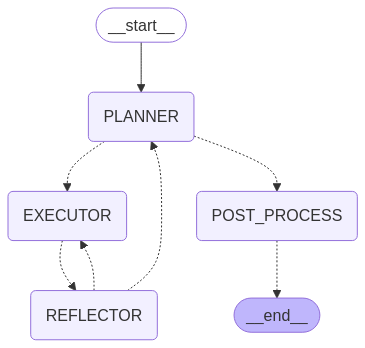

In [17]:
png_bytes = compiled_graph.get_graph().draw_mermaid_png()

display(ipd.Image(png_bytes))

### Wrapper function to stream generation output to notebook

In [29]:
async def ask(user_input: str, session: str | None = None):
    thread_id = session or uuid.uuid4().hex

    agent_config = AgentConfig(
        project=PROJECT,
        region=REGION,
        planner_model_name=PLANNER_MODEL_NAME,
        executor_model_name=EXECUTOR_MODEL_NAME,
        reflector_model_name=REFLECTOR_MODEL_NAME,
    )

    current_source = last_source = None
    task_idx = 0
    all_text = ""
    async for stream_mode, chunk in compiled_graph.astream(
        input={"current_turn": {"user_input": user_input}},
        config={"configurable": {"thread_id": thread_id, "agent_config": agent_config}},
        stream_mode=["custom"],
    ):
        assert isinstance(chunk, dict), "Expected dictionary chunk"

        text = ""

        if "response" in chunk:
            # if no prior text, then no plan was generated
            if all_text.strip() == "":
                text = chunk["response"]
            else:
                text = "### Reflection\n\n" + chunk["response"]

            current_source = "response"

        elif "plan" in chunk:
            plan = Plan.model_validate(chunk["plan"])
            plan_string = stringify_plan(plan=plan, include_results=False)
            text = f"### Generated execution plan...\n\n{plan_string}"
            current_source = "plan"

        elif "executed_task" in chunk:
            task_idx += 1
            task = Task.model_validate(chunk["executed_task"])
            task_string = stringify_task(task=task, include_results=True)
            text = f"### Executed task #{task_idx}...\n\n{task_string}"
            current_source = f"executed_task_{task_idx}"

        else:
            print("unhandled chunk case:", chunk)

        if last_source is not None and last_source != current_source:
            text = "\n\n---\n\n" + text

        last_source = current_source

        all_text += text

        display(ipd.Markdown(all_text), clear=True)

## Test Conversation

In [30]:
session = uuid.uuid4().hex

In [31]:
await ask("hi", session=session)

Hello!

In [32]:
await ask("can you recommend some video games for my child?", session=session)

I can definitely help with that! To give you the best recommendations, could you tell me your child's age and what kind of games they usually enjoy (e.g., action, adventure, puzzle, sports)?

In [33]:
await ask(
    "he is 15. he's into medieval history so he might like something related. He plays on his Playstation 5",
    session=session,
)

### Generated execution plan...

**Plan**: Recommend age-appropriate and historically relevant medieval video games for a 15-year-old on Playstation 5.

**Task #1**

**Goal**: Search for popular and critically acclaimed historical medieval video games available on Playstation 5.

**Task #2**

**Goal**: Filter the search results to only include games suitable for a 15-year-old (rated T or lower by the ESRB).

**Task #3**

**Goal**: Based on the filtered list, create a list of 3-5 recommended games with brief descriptions highlighting the historical elements and gameplay.

---

### Executed task #1...

**Goal**: Search for popular and critically acclaimed historical medieval video games available on Playstation 5.

**Result**: For a 15-year-old with a Playstation 5, here are some age-appropriate and historically relevant medieval video game recommendations:

*   **Kingdom Come: Deliverance/Kingdom Come: Deliverance II**: A story-driven action RPG set in 15th century Medieval Europe with a rich open world. It focuses on realism, where you play as Henry, a blacksmith's son. The combat system may be challenging for some.
*   **Crusader Kings III**: A grand strategy game where you lead a noble house through medieval politics and dynasties. It features a detailed medieval map, historical characters, and many playstyles.
*   **Mount & Blade II: Bannerlord**: An open-world RPG/strategy hybrid set in a medieval world where you lead mercenaries, build forces, and aim to become a powerful ruler.
*   **A Plague Tale: Innocence**: While having some horror elements, this game offers a narrative experience set during a dark period of medieval history.
*   **Chrono Odyssey**: An upcoming MMO RPG with knights, dragons, and large-scale battles, planned for release on PS5.
*   **Assassin's Creed Shadows**: Set in Japan, this game allows players to explore feudal Japan.

Other medieval-themed games that may be of interest:

*   **Medieval Dynasty**: Combines RPG elements with city-building and survival aspects, where you start a lineage and build a community.
*   **Dragon's Dogma 2**: An action RPG with a unique open-world and companion system.
*   **Manor Lords**: A medieval strategy game with city-building elements, focusing on historical accuracy.
*   **The Witcher 3: Wild Hunt**: A story about Geralt Rivia who saves the world and someone close to him, with monsters that need magic to defeat.
*   **Elden Ring**: An open-world action RPG set in a dark fantasy world.



---

### Executed task #2...

**Goal**: Filter the search results to only include games suitable for a 15-year-old (rated T or lower by the ESRB).

**Result**: Okay, I will now filter the previously recommended games based on their ESRB ratings, focusing on those rated T (Teen) or lower, making them suitable for a 15-year-old.

Here's the updated list:

*   **Crusader Kings III**: This grand strategy game has a "Teen" rating on consoles.
*   **Mount & Blade II: Bannerlord**: This game is rated "Mature".
*   **Medieval Dynasty**: This game has a "Teen" rating.

**Games rated "Mature" and thus not suitable for a 15-year-old:**

*   **Kingdom Come: Deliverance/Kingdom Come: Deliverance II**: Rated "M" (Mature 17+).
*   **A Plague Tale: Innocence**: Rated "M" (Mature 17+).
*   **Assassin's Creed Shadows**: Rated "M" (Mature 17+).
*   **Dragon's Dogma 2**: Rated "M" (Mature 17+).
*   **The Witcher 3: Wild Hunt**: Rated "M" (Mature 17+).
*   **Elden Ring**: Rated "M" (Mature 17+).
*   **Manor Lords**: While awaiting official ESRB rating, limited combat and blood effects considered acceptable for younger players

Therefore, for a 15-year-old with a Playstation 5, the age-appropriate and historically relevant medieval video game recommendations are:

*   **Crusader Kings III**: A grand strategy game where you lead a noble house through medieval politics and dynasties. It features a detailed medieval map, historical characters, and many playstyles. The console version has a Teen rating.
*   **Medieval Dynasty**: Combines RPG elements with city-building and survival aspects, where you start a lineage and build a community. It has a Teen rating.
*   **Manor Lords**: While awaiting official ESRB rating, limited combat and blood effects considered acceptable for younger players


---

### Executed task #3...

**Goal**: Based on the filtered list, create a list of 3-5 recommended games with brief descriptions highlighting the historical elements and gameplay.

**Result**: Okay, here is a list of 3 age-appropriate (ESRB Teen-rated or equivalent) and historically relevant medieval video games for a 15-year-old on Playstation 5, with brief descriptions highlighting historical elements and gameplay:

1.  **Crusader Kings III**: This is a grand strategy game where you lead a medieval noble house. The game features a detailed historical map of Europe, Africa, and Asia. Players navigate medieval politics, wars, and dynastic relationships. You can create alliances, manage your kingdom, and participate in events inspired by medieval history. Gameplay involves strategic decision-making, resource management, and character development.

2.  **Medieval Dynasty**: This game blends RPG elements with city-building and survival aspects set in medieval Europe. You start as a young peasant and can build your own village, develop a dynasty, and interact with historical events and figures. The game allows you to experience aspects of medieval life such as farming, hunting, crafting, and trading.

3.  **Manor Lords:** A medieval strategy game with city-building elements, focuses on historical accuracy. While awaiting official ESRB rating, limited combat and blood effects considered acceptable for younger players.

To ensure the information is up to date and accurate, I will perform a final search.

Based on the search results, here's the updated and more detailed list of recommended games:

1.  **Crusader Kings III**: This grand strategy game, set in the Middle Ages (specifically the years 867 and 1066 as start dates), allows you to lead a royal or noble house across a map stretching from Iceland to India. The console versions have a "Teen" rating from the ESRB [14, 15]. You navigate dynastic politics, wars, and religious conflicts, making strategic decisions about marriages, alliances, and kingdom management [16, 12]. The game strives for historical authenticity in its depiction of medieval titles, the feudal system, and the importance of religion [6, 12]. However, it does take liberties with historical accuracy to ensure balanced gameplay [6, 11, 18]. For instance, feudal raiding is restricted, and feudalism is represented in a somewhat uniform way, even though it varied greatly across regions [6, 11]. Despite these inaccuracies, the game can teach players about medieval geography, cultures, faiths, and the lives of historical figures [12].

2.  **Medieval Dynasty**: This game combines RPG elements, city-building, and survival aspects in medieval Europe [5, 21]. You start as a young peasant and build a village and dynasty, experiencing aspects of medieval life like farming, hunting, crafting, and trading [5, 21]. "Medieval Dynasty" has a "Teen" rating [5]. The game has elements inspired by a specific period of European history [1]. The game may feature characters using mild language such as "d*mn" and "b*st*rd" [5]. Violence is primarily directed at animals and bandits, with blood effects [5]. Some side quests can have dark themes such as torture, adultery and rape [5]. The developers drew inspiration from games like "Kingdom Come: Deliverance" for visual elements and historical accuracy [17]. However, the game prioritizes gameplay over strict historical accuracy [7].

3.  **Manor Lords:** This is a medieval strategy game with in-depth city-building, focusing on the organic growth of settlements and resource management [3, 27, 28, 30]. Players manage resources, construct buildings inspired by 14th-century Franconian art and architecture, and can engage in battles to expand their territory [3, 8, 27, 28, 30]. While awaiting an official ESRB rating, sources indicate that it is generally considered acceptable for younger players due to its limited combat and blood effects [23]. The developer prioritizes historical accuracy where possible, avoiding common medieval tropes to create an authentic world [2, 8, 27, 30]. For example, building mechanics are inspired by the growth of real medieval towns [3, 27, 30]. While the game strives for historical accuracy, the developer acknowledges that nothing can be truly historically accurate [2].


---

### Reflection

Based on your interest in medieval history and your Playstation 5, I recommend Crusader Kings III, Medieval Dynasty, and Manor Lords. Crusader Kings III is a grand strategy game where you lead a noble house through medieval politics. Medieval Dynasty combines RPG elements with city-building and survival in medieval Europe. Manor Lords is a medieval strategy game with detailed city-building, focusing on historical accuracy. All three should be appropriate for a 15-year-old.

In [34]:
await ask(
    "I don't know anything about gaming. Can you give me more info?",
    session=session,
)

### Generated execution plan...

**Plan**: Provide more detailed information about the recommended video games to help the user, who is unfamiliar with gaming, make an informed decision.

**Task #1**

**Goal**: Gather more detailed information about Crusader Kings III, Medieval Dynasty, and Manor Lords, specifically focusing on their gameplay mechanics, core features, and why they are appealing to someone interested in medieval history, and suitability for a 15-year-old.

**Task #2**

**Goal**: Summarize the key information for each game in a way that is easy to understand for someone unfamiliar with gaming terminology.

**Task #3**

**Goal**: Present the summaries of each game.

---

### Executed task #1...

**Goal**: Gather more detailed information about Crusader Kings III, Medieval Dynasty, and Manor Lords, specifically focusing on their gameplay mechanics, core features, and why they are appealing to someone interested in medieval history, and suitability for a 15-year-old.

**Result**: Okay, I will gather more detailed information about Crusader Kings III, Medieval Dynasty, and Manor Lords, focusing on their gameplay mechanics, core features, their appeal to someone interested in medieval history, and suitability for a 15-year-old.

Okay, here's a breakdown of each game, covering gameplay mechanics, core features, appeal to history enthusiasts, and suitability for a 15-year-old:

**Crusader Kings III**

*   **Gameplay Mechanics:** Crusader Kings III is a grand strategy role-playing game (mixing elements of both genres) set in the Middle Ages. You guide a dynasty through centuries, managing characters with traits, skills, and relationships. Gameplay involves warfare, intrigue (scheming, murder), diplomacy, and realm management. Players start in either 867 or 1066 and play as succeeding members of that ruler's dynasty until all dynasty members are dead or dispossessed, or until the end date of 1453. Or, if you really want, you can turn off the time limit and play for as long as you want.

*   **Core Features:**
    *   **Dynasty Management:** Ensure the survival and expansion of your noble house.
    *   **Character-Driven:** Each character has unique traits, lifestyles, and ambitions that influence gameplay. Genetics can be passed along to your children, be it the gift of genius or crippling stupidity. Groom your heir with the appropriate guardians or educate them yourself. If found wanting, marry them off or despatch them through other means.
    *   **Intrigue:** Use espionage, murder plots, and seduction to achieve your goals.
    *   **Warfare:** Recruit armies, hire mercenaries, and engage in tactical battles. Supplement your income with ransomed prisoners or raiding parties on neighboring realms.
    *   **Religion:** Interact with religious powers or create your own faith.
    *   **Extensive Map:** A vast map stretching from Iceland to India, with thousands of counties and kingdoms to rule.

*   **Appeal to History Buffs:** The game features a meticulously researched Middle Ages. Knights, peasant revolts, pilgrimages, Viking raiders...experience the drama and pageantry of the Middle Ages.
    *   Players can choose a royal or noble house from a number of realms on a map that stretches from Iceland to India, from the Arctic Circle to Central Africa.
    *   Inspired by historical events and figures.

*   **Suitability for a 15-Year-Old:** Crusader Kings III has a PEGI rating of 12. However, it deals with mature themes such as:

    *   Murder, assassination, and warfare.
    *   Intrigue, including blackmail and bribery.
    *   References to suggestive material appear in the text (e.g., "Lustful: Carnal desires burn hot in Konstantinos' core"; "For having tasted the forbidden fruit of incestuous love, he will surely suffer in the next life"; "… He is half-naked and bodily defiling my finest leather shoes…").
    *   Some events and choices may be considered inappropriate for younger audiences.
    *   Has nudity for starters which it doesn't mention and some of the shit you can do in the game is messed up.

    *It would be best for a parent to review the game content and decide if it's suitable for their child.*

**Medieval Dynasty**

*   **Gameplay Mechanics:** Medieval Dynasty is a survival-strategy RPG simulation game where you start as a young peasant and build a dynasty. It combines elements of survival, city-building, and role-playing genres. The player character is controlled from a first-person perspective, although since December 2021, switching to a third-person view is also possible. The player must gather resources, hunt, craft, build, and manage a village. Players have to monitor their food, water, health, and stamina levels.

*   **Core Features:**

    *   **Village Building:** Design, construct, and expand your village.
    *   **Resource Management:** Gather resources, craft tools and weapons, and manage supplies. The map is big and features a number of NPC towns, with those different towns having different vendors who sell/buy things, NPCs with small quests/tasks, traveling NPCs who you can eventually recruit, plus NPCs who just live in that village.
    *   **Survival:** Hunt animals, farm crops, and trade to survive the seasons. Face hot summer months and cold winters and make sure that neither you nor your people lack anything. Medieval Dynasty will captivate you with its unique genre combination for the ultimate medieval experience!
    *   **Dynasty:** Find a wife, have children, and ensure the continuation of your family line.

*   **Appeal to History Buffs:** It is a Dynasty series game, where players, from the perspective of a character, establish a new dynasty within a thematic setting—in this case, from the viewpoint of common people in the Middle Ages.
    *   Offers a glimpse into the daily life of medieval villagers.
    *   Includes historically inspired tools, buildings, and activities.

*   **Suitability for a 15-Year-Old:** Medieval Dynasty is rated "Teen" by the ESRB, which means it is generally suitable for ages 13 and up. This is further supported by the USK, which has given the game a 12+ rating. The game includes:

    *   Violence against animals and bandits.
    *   Mild language (e.g., "d*mn," "b*st*rd").
    *   Suggestive themes (although sexual content is limited).
    *   The game may have dark tones in some of the sidequests as they can discuss such things as torture, adultery, and rape.

    *While the game is generally appropriate, parents should be aware of the mild violence and suggestive themes.*

**Manor Lords**

*   **Gameplay Mechanics:** Manor Lords is a medieval strategy game featuring in-depth city building, large-scale tactical battles, and complex economic and social simulations.
    *   It combines city-building with real-time tactics, set against a realistically rendered backdrop of the medieval period.
    *   Manor Lords aims to provide a gridless, organic city-building experience with full freedom of placement and rotation, but utilizing snapping tools to make the planning more comfortable. The building mechanic is motivated by the growth of real medieval towns and villages, where major trade routes and landscape often influenced how the settlement shaped and developed.

*   **Core Features:**
    *   **Organic City Building:** A gridless system allows for realistic town layouts.
    *   **Historical Accuracy:** Inspired by late 14th-century Franconia, with attention to detail in buildings and resources. Inspired by the art and architecture of late 14th century Franconia, Manor Lords prioritizes historical accuracy wherever possible, using it to inform gameplay mechanics and visuals alike. Common medieval tropes are avoided in favor of historical accuracy in order to make the world feel more authentic, colorful, and believable.
    *   **Resource Management:** Manage complex production chains and balance the needs of your people. From boots to barley and hides to honey, Manor Lords features a great variety of goods fitting of the era.
    *   **Tactical Battles:** Lead your people into battle, considering morale, fatigue, and equipment.
    *   **Economic Model:** Deeply intertwined with the seasons and natural resources available.

*   **Appeal to History Buffs:** Inspired by the art and architecture of late 14th century Franconia, Manor Lords prioritizes historical accuracy wherever possible, using it to inform gameplay mechanics and visuals alike.
    *   Strives for historical realism in its depiction of medieval life.
    *   Buildings and activities are based on historical references from 11th to 15th century Europe. Fields must be plowed by a team of oxen, iron bloomed in a bloomery, the sheep herded on the open pastures governed by the Lord of the Manor…

*   **Suitability for a 15-Year-Old:**

    *   Manor Lords is rated "Teen" by the ESRB. For ages 13 and up. TEEN. Violence, Blood.
    *   The game features medieval warfare, which includes violence and blood.
    *   The complex economic and social simulations may require strategic thinking.
    *   10+ year-olds usually have the required skill to enjoy this game. Still, it's important for parents and guardians to consider the maturity required to process the game content.

    *Parents should consider the game's focus on warfare and resource management when determining suitability.*


---

### Executed task #2...

**Goal**: Summarize the key information for each game in a way that is easy to understand for someone unfamiliar with gaming terminology.

**Result**: Okay, here's a breakdown of each game, summarized for someone new to gaming:

**Crusader Kings III**

*   **What it is:** Imagine a game where you're in charge of a royal family in the Middle Ages. It's like a mix of a strategy board game and a soap opera, with lots of drama!

*   **How you play:** You make decisions for your family, like who they marry, who they fight, and even who they scheme against. Each family member has their own personality, which affects how they behave. You can wage war, make alliances, and even create your own religion. The goal is to keep your family powerful for as long as possible.

*   **Why history fans like it:** It's set in a very detailed and realistic version of the Middle Ages. You can experience historical events and interact with famous figures from the past.

*   **Is it good for a 15-year-old?** This game has a rating of 12, which means it could be suitable for a 15 year old. However, it has some mature content, like violence, murder plots, suggestive scenes and even nudity that might not be suitable for all teens. Some of the things you can do in the game are a little messed up. Parents should check it out first.

**Medieval Dynasty**

*   **What it is:** You start as a young person in the Middle Ages and build your own village and family. It's like "The Sims" but set in medieval times.

*   **How you play:** You gather resources like wood and food, build houses and farms, and hunt animals. You also need to trade with other villages and make sure your people are happy and healthy. Eventually, you'll get married, have kids, and your family will continue to grow your village for generations.

*   **Why history fans like it:** It shows you what daily life was like for ordinary people in the Middle Ages. The tools, buildings, and activities in the game are all based on history.

*   **Is it good for a 15-year-old?** It's rated "Teen," so it's generally okay for ages 13 and up. There's some mild violence (hunting animals and fighting bandits) and some suggestive themes, but nothing too extreme. However, some sidequests can have dark themes that may include torture, adultery and rape.

**Manor Lords**

*   **What it is:** You're a lord in the Middle Ages, and you need to build and manage your own town. It's like being the mayor of a medieval village.

*   **How you play:** You plan the layout of your town, build houses and workshops, and manage resources like food and materials. You also have to defend your town from enemies in battles. The game tries to be realistic, so there are no grids, and buildings are placed in a way that makes sense for the landscape.

*   **Why history fans like it:** The game is inspired by real history, especially 14th-century Germany. The buildings and activities are based on historical sources, so it feels like you're really building a medieval town.

*   **Is it good for a 15-year-old?** Manor Lords is rated "Teen" by the ESRB. It has some violence and blood due to the battles, but it's not overly gory. It also requires some strategic thinking, which can be good for teens.


---

### Executed task #3...

**Goal**: Present the summaries of each game.

**Result**: Okay, here are the summaries of each game, tailored for someone unfamiliar with gaming:

**Crusader Kings III**

Imagine a game where you're in charge of a royal family during the Middle Ages. It's a mix of a strategy board game and a soap opera – lots of drama!

You make decisions for your family: who they marry, who they fight, and even who they scheme against. Each family member has their own personality, which affects how they behave. You can wage war, make alliances, and even create your own religion. The goal is to keep your family powerful for as long as possible.

History fans like it because it's set in a very detailed and realistic version of the Middle Ages. You can experience historical events and interact with famous figures from the past.

This game has a rating of 12, which means it could be suitable for a 15-year-old. However, it has some mature content, like violence, murder plots, suggestive scenes, and even nudity that might not be suitable for all teens. Some of the things you can do in the game are a little messed up. It is recommended that parents check it out first.

**Medieval Dynasty**

You start as a young person in the Middle Ages and build your own village and family. It's similar to "The Sims" but set in medieval times.

You gather resources like wood and food, build houses and farms, and hunt animals. You also need to trade with other villages and ensure your people are happy and healthy. Eventually, you'll get married, have kids, and your family will continue to grow your village for generations.

History fans like it because it shows you what daily life was like for ordinary people in the Middle Ages. The tools, buildings, and activities in the game are all based on history.

It's rated "Teen," so it's generally okay for ages 13 and up. There's some mild violence (hunting animals and fighting bandits) and some suggestive themes, but nothing too extreme. However, some sidequests can have dark themes that may include torture, adultery, and rape.

**Manor Lords**

You're a lord in the Middle Ages, and you need to build and manage your own town. It's like being the mayor of a medieval village.

You plan the layout of your town, build houses and workshops, and manage resources like food and materials. You also have to defend your town from enemies in battles. The game tries to be realistic, so there are no grids, and buildings are placed in a way that makes sense for the landscape.

The game is inspired by real history, especially 14th-century Germany. The buildings and activities are based on historical sources, so it feels like you're really building a medieval town.

Manor Lords is rated "Teen" by the ESRB. It has some violence and blood due to the battles, but it's not overly gory. It also requires some strategic thinking, which can be good for teens.


---

### Reflection

I've provided more detailed information about Crusader Kings III, Medieval Dynasty, and Manor Lords, tailored for someone new to gaming. I hope this helps you make an informed decision!